## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

### Machine Learning com Scikit-Learn

Problema de Negócio:

Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # para testar o modelo antes de fazer o deploy

### Carregando os Dados

In [2]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [3]:
df_dsa.shape

(500, 2)

In [4]:
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [5]:
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [6]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
# Análise Exploratória
# 1. Verifica se há valores ausentes
df_dsa.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [8]:
# 2. Verifica a correlação entre as variáveis
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [9]:
# 3. Verifica o describe das colunas numéricas
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [11]:
# 4. Verifica o describe da variável preditora
df_dsa['salario'].describe()

count     500.000000
mean     6018.930000
std       848.697853
min      3664.000000
25%      5473.000000
50%      6013.500000
75%      6542.000000
max      9348.000000
Name: salario, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

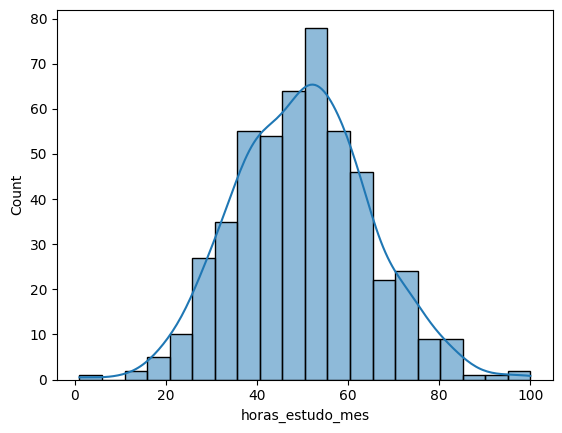

In [13]:
# histograma da variável preditora (independente)
sns.histplot(data = df_dsa, x = 'horas_estudo_mes', kde = True)

### Preparação dos Dados

In [18]:
# Prepara a variável de entrada X
# Convertemos os dados de entrada em um array e gravamos em X, porque o algorítmo de regressão linear do sklearn espera receber 
# os dados de entrada no formato de matriz, ou seja, array numpy. 

X = np.array(df_dsa['horas_estudo_mes'])

In [19]:
type(X)

numpy.ndarray

In [20]:
X.shape

(500,)

In [33]:
print(X)

[ 57.  48.  60.  73.  46.  46.  74.  62.  43.  58.  43.  43.  54.  21.
  24.  42.  35.  55.  36.  29.  72.  47.  51.  29.  42.  52.  33.  56.
  41.  46.  41.  78.  50.  34.  62.  32.  53.  21.  30.  53.  61.  53.
  48.  45.  28.  39.  43.  66.  55.  24.  55.  44.  40.  59.  65.  64.
  37.  45.  55.  65.  43.  47.  33.  32.  62.  70.  49.  65.  55.  40.
  55.  73.  49.  73.  11.  62.  51.  46.  51.  20.  47.  55.  72.  42.
  38.  42.  64.  55.  42.  58.  51.  65.  39.  45.  44.  28.  54.  54.
  50.  46.  29.  44.  45.  38.  48.  56.  78.  53.  54.  49.  21.  50.
  51.  87.  47.  55.  49.  32.  67.  61.  62.  36.  71.  29.  59.  83.
  35.  42.  51.  42.  27.  51.  34.  57.  36.  73.  38.  45.  62.  32.
  53.  70.  26.  53.  54.  62.  31.  30.  58.  54.  54.  55.  40.  53.
  54.  39.  78.  57.  32.  60.  35.  62.  67.  38.  64.  56.  62.  78.
  46.  39.  37.  38.  49.  55.  54.  62.  50.  72.  46.  91.  59.  37.
  34.  57.  47.  61.  57.  49.  37.  27.  43.  63.  53.  31.  53.  56.
  37. 

In [34]:
# Ajusta o shape de X
X = X.reshape(-1, 1)

In [35]:
print(X)

[[ 57.]
 [ 48.]
 [ 60.]
 [ 73.]
 [ 46.]
 [ 46.]
 [ 74.]
 [ 62.]
 [ 43.]
 [ 58.]
 [ 43.]
 [ 43.]
 [ 54.]
 [ 21.]
 [ 24.]
 [ 42.]
 [ 35.]
 [ 55.]
 [ 36.]
 [ 29.]
 [ 72.]
 [ 47.]
 [ 51.]
 [ 29.]
 [ 42.]
 [ 52.]
 [ 33.]
 [ 56.]
 [ 41.]
 [ 46.]
 [ 41.]
 [ 78.]
 [ 50.]
 [ 34.]
 [ 62.]
 [ 32.]
 [ 53.]
 [ 21.]
 [ 30.]
 [ 53.]
 [ 61.]
 [ 53.]
 [ 48.]
 [ 45.]
 [ 28.]
 [ 39.]
 [ 43.]
 [ 66.]
 [ 55.]
 [ 24.]
 [ 55.]
 [ 44.]
 [ 40.]
 [ 59.]
 [ 65.]
 [ 64.]
 [ 37.]
 [ 45.]
 [ 55.]
 [ 65.]
 [ 43.]
 [ 47.]
 [ 33.]
 [ 32.]
 [ 62.]
 [ 70.]
 [ 49.]
 [ 65.]
 [ 55.]
 [ 40.]
 [ 55.]
 [ 73.]
 [ 49.]
 [ 73.]
 [ 11.]
 [ 62.]
 [ 51.]
 [ 46.]
 [ 51.]
 [ 20.]
 [ 47.]
 [ 55.]
 [ 72.]
 [ 42.]
 [ 38.]
 [ 42.]
 [ 64.]
 [ 55.]
 [ 42.]
 [ 58.]
 [ 51.]
 [ 65.]
 [ 39.]
 [ 45.]
 [ 44.]
 [ 28.]
 [ 54.]
 [ 54.]
 [ 50.]
 [ 46.]
 [ 29.]
 [ 44.]
 [ 45.]
 [ 38.]
 [ 48.]
 [ 56.]
 [ 78.]
 [ 53.]
 [ 54.]
 [ 49.]
 [ 21.]
 [ 50.]
 [ 51.]
 [ 87.]
 [ 47.]
 [ 55.]
 [ 49.]
 [ 32.]
 [ 67.]
 [ 61.]
 [ 62.]
 [ 36.]
 [ 71.]
 [ 29.]
 [ 59.]


In [36]:
X.shape

(500, 1)

In [37]:
# Prepara a variável alvo
y = df_dsa['salario']

In [38]:
print(y)

0      6813.0
1      6855.0
2      5801.0
3      7431.0
4      5475.0
        ...  
495    6259.0
496    6099.0
497    6170.0
498    5064.0
499    5236.0
Name: salario, Length: 500, dtype: float64


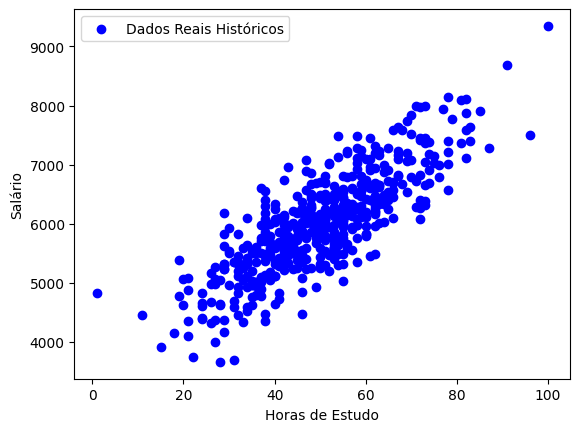

In [39]:
# Gráfico de dispersão entre X e Y
plt.scatter(X, y, color = 'blue', label = 'Dados Reais Históricos')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

O Gráfico demonstra que a correlação que entre as horas de estudo e o salário é uma correlação positiva, isto é, a medida
que aumentam o número de horas, aumenta também o salário a receber.

In [40]:
# Dividir dados em treinamento e teste
# o train_test_split faz uma separação aleatória dos dados, isto quer dizer que sempre que executarmos o jupyter notebook, 
# teremos dados diferentes para as variáveis de treino e teste
# dos dados, vamos separar de forma aleatória 20% (test_size = 0.2) para o teste e consequentemente o restante 80% irá para a 
# amostra de treino
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
X_treino.shape

(400, 1)

In [42]:
X_teste.shape

(100, 1)

In [43]:
y_treino.shape

(400,)

In [44]:
y_teste.shape

(100,)

### Modelagem Preditiva (Machine Learning)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [46]:
# Cria o modelo de regressão linear simples
modelo = LinearRegression()

In [48]:
# Treina o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

LinearRegression()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

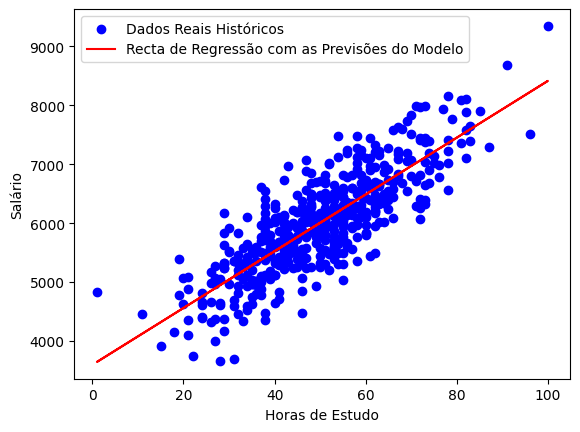

In [49]:
# Visualiza a recta de regressão linear (previsões) e os dados reais usados no treinamento
# modelo.predict(X) - previsões de y
# Ao criar o modelo, nós estamos buscando uma fórmula matemática (aproximação alvo) que explica a relação entre X e Y 
# o modelo não será 100% preciso, todo o modelo tem uma taxa de erros que é totalmente aceitável. se a taxa de erro é muito 
# alta, então é nosso trabalho reduzir a taxa de erro mudando algoritmo, mudando estratégia de pré-processamento, mudando até 
# chegarmos a uma taxa de erros tolerável e aceitável, de acordo com o problema de negócio que temos em mãos. 

plt.scatter(X, y, color = 'blue', label = 'Dados Reais Históricos')
plt.plot(X, modelo.predict(X), color = 'red', label = 'Recta de Regressão com as Previsões do Modelo')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [50]:
# Os valores abaixo são valores que o modelo aprendeu de acordo com os dados de teste fornecidos:
# Coeficiente, modelo.intercept e modelo.coef
# Avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [51]:
# Intercepto - parâmetro w0
modelo.intercept_

3596.783724372753

In [52]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

Algoritmo de Regressão Linear:

![DSA](imagens/reglinear.png)

### Deploy do modelo: nada mais é do que fazer o uso do modelo, ou ainda entregar o modelo para uso.
Usaremos o modelo para prever o salário com base nas horas de estudo.

In [55]:
# Define um novo valor para as horas de estudo
horas_estudo_novo = np.array([[48]])

In [60]:
print(horas_estudo_novo)

[[48]]


In [61]:
horas_estudo_novo.shape

(1, 1)

In [63]:
# Faz a previsão com o modelo de treinamento
salario_previsto = modelo.predict(horas_estudo_novo)
print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês, seu salário poderá ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês, seu salário poderá ser igual a [5909.5126574]


In [64]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1 * X
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [65]:
# Define um novo valor para horas
horas_estudo_novo_2 = np.array([[65]])

# Faz a previsão do modelo criado
salario_previsto_2 = modelo.predict(horas_estudo_novo_2)

print(f"Se você estudar cerca de", horas_estudo_novo_2, "horas por mês, seu salário poderá ser igual a", salario_previsto_2)

Se você estudar cerca de [[65]] horas por mês, seu salário poderá ser igual a [6728.60415452]


In [66]:
# Define um novo valor
horas_estudo_novo_3 = np.array([[73]])

# Faz a previsão com o modelo treinado
salario_previsto_3 = modelo.predict(horas_estudo_novo_3)

print(f"Se você estudar cerca de", horas_estudo_novo_3, "horas por mês, seu salário poderá ser igual a", salario_previsto_3)

Se você estudar cerca de [[73]] horas por mês, seu salário poderá ser igual a [7114.05897669]
